<a href="https://colab.research.google.com/github/21KA/rainfall-prediction/blob/main/Rainfall_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RAINFALL PREDICTION MODEL

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/DATASET_RAINFALL'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = "/content/drive/MyDrive/DATASET_RAINFALL/weatherAUS.csv"

df = pd.read_csv(data)

In [ ]:
df.shape

(145460, 23)

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
columns=df.columns
columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df.info

<bound method DataFrame.info of               Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:

df['RainTomorrow'].isnull().sum()


3267

In [ ]:
df['RainTomorrow'].nunique()


2

<Axes: >

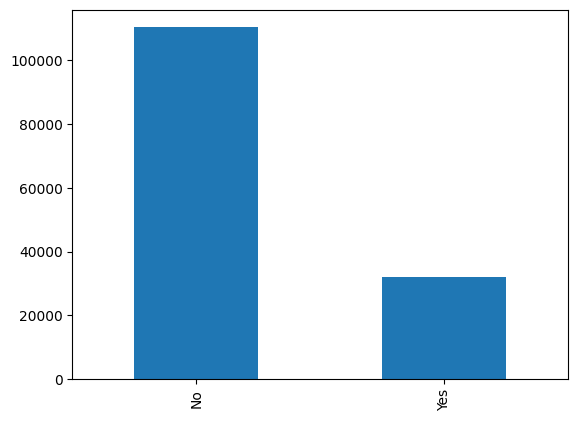

In [ ]:

df['RainTomorrow'].value_counts().plot(kind='bar')


In [ ]:

df['RainTomorrow'].value_counts()


No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [ ]:
df['RainTomorrow'].value_counts()/len(df['RainTomorrow'])

No     0.758394
Yes    0.219146
Name: RainTomorrow, dtype: float64

In [ ]:

df['RainTomorrow'].replace(['Yes', 'No'], [1, 0], inplace=True)
df['RainToday'].replace(['Yes', 'No'], [1, 0], inplace=True)

handling imbalance dataset

In [ ]:

from sklearn.utils import resample
df_majority = df[df['RainTomorrow'] == 0]
df_minority = df[df['RainTomorrow'] == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority))

# Combine majority and upsampled minority classes
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Check class distribution
df_upsampled['RainTomorrow'].value_counts()


0.0    110316
1.0    110316
Name: RainTomorrow, dtype: int64

<Axes: >

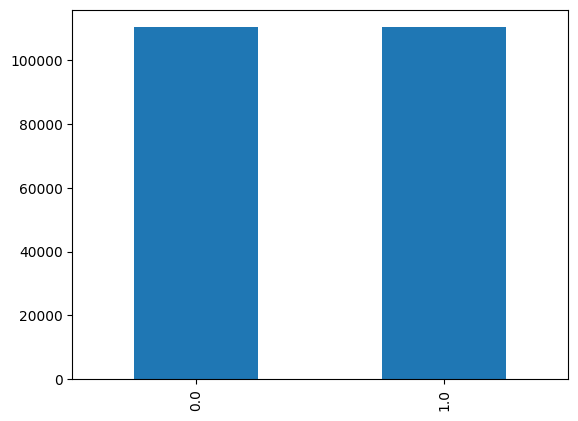

In [ ]:
df_upsampled['RainTomorrow'].value_counts().plot(kind='bar')

<Axes: >

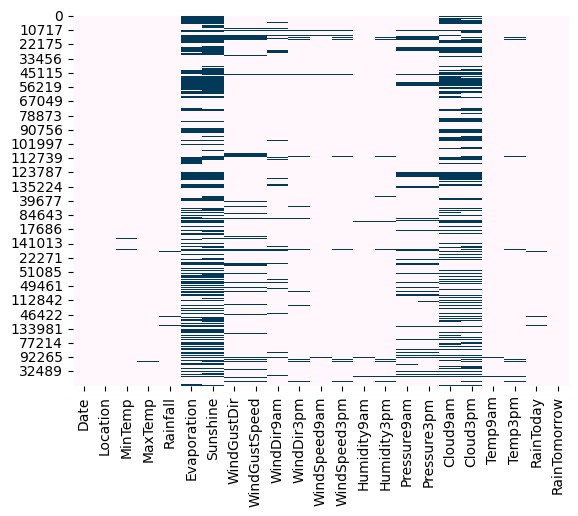

In [ ]:
import seaborn as sns
sns.heatmap(df_upsampled.isnull(), cbar=False, cmap='PuBu')

In [ ]:
k=df.isnull().sum()
l=k/len(df)*100>35
l

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation       True
Sunshine          True
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am          True
Cloud3pm          True
Temp9am          False
Temp3pm          False
RainToday        False
RainTomorrow     False
dtype: bool

handling missing values

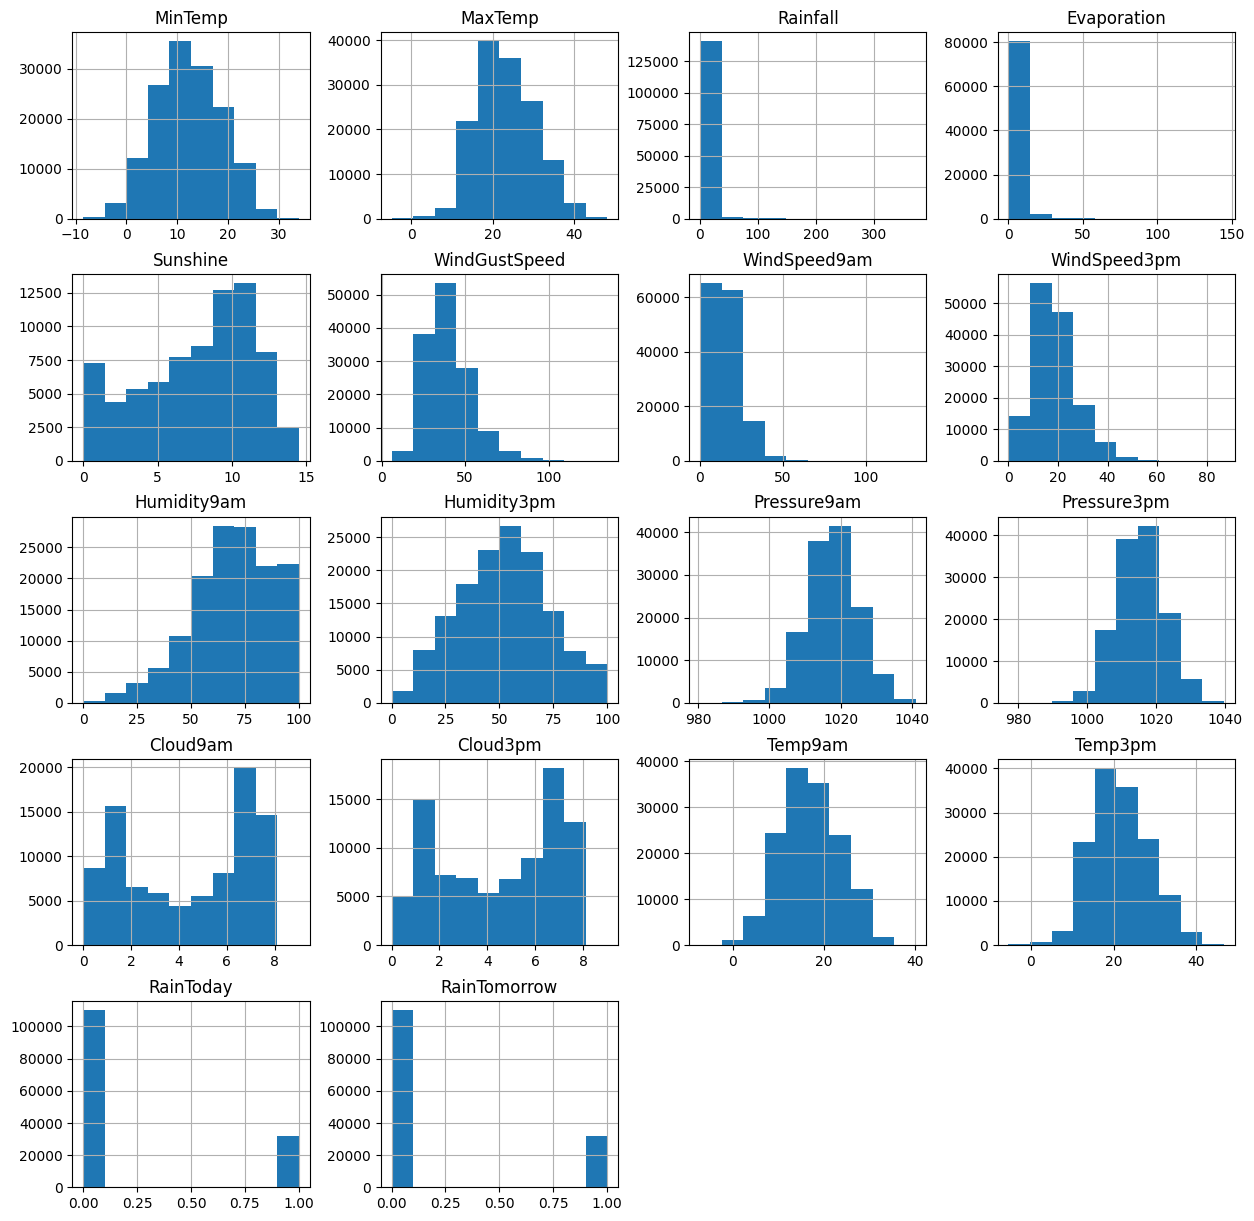

In [ ]:
#numeric value

df.hist(figsize=(15,15))
plt.show()


In [ ]:


cat_columns = [col for col in df.columns if df[col].dtype == 'object']
print(cat_columns)


['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


In [ ]:
df_upsampled['Date'] = df_upsampled['Date'].fillna(df_upsampled['Date'].mode()[0])
df_upsampled['Location'] = df_upsampled['Location'].fillna(df_upsampled['Location'].mode()[0])
df_upsampled['WindGustDir'] = df_upsampled['WindGustDir'].fillna(df_upsampled['WindGustDir'].mode()[0])
df_upsampled['WindDir9am'] = df_upsampled['WindDir9am'].fillna(df_upsampled['WindDir9am'].mode()[0])
df_upsampled['WindDir3pm'] = df_upsampled['WindDir3pm'].fillna(df_upsampled['WindDir3pm'].mode()[0])

In [ ]:
# convert them into numerical values

from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in df_upsampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    df_upsampled[col] = lencoders[col].fit_transform(df_upsampled[col])


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = df_upsampled.copy(deep=True)
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(df_upsampled)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
<ipython-input-25-7c5b659bb8cd>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  MiceImputed.iloc[:, :] = mice_imputer.fit_transform(df_upsampled)


In [ ]:
MiceImputed.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396.0,2.0,13.4,22.9,0.6,5.775974,7.426867,13.0,44.0,13.0,...,71.0,22.0,1007.7,1007.1,8.000000,4.869212,16.9,21.8,0.0,0.0
1,397.0,2.0,7.4,25.1,0.0,5.652647,11.534835,14.0,44.0,6.0,...,44.0,25.0,1010.6,1007.8,1.730084,2.607609,17.2,24.3,0.0,0.0
2,398.0,2.0,12.9,25.7,0.0,7.760420,12.362283,15.0,46.0,13.0,...,38.0,30.0,1007.6,1008.7,1.819739,2.000000,21.0,23.2,0.0,0.0
3,399.0,2.0,9.2,28.0,0.0,5.978053,11.818598,4.0,24.0,9.0,...,45.0,16.0,1017.6,1012.8,1.213498,2.104545,18.1,26.5,0.0,0.0
4,400.0,2.0,17.5,32.3,1.0,6.918246,5.732583,13.0,41.0,1.0,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0


In [ ]:
MiceImputed.isna()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33181,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
62836,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
90266,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14413,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Date             1540.000000
Location           25.000000
MinTemp             9.300000
MaxTemp            10.200000
Rainfall            2.400000
Evaporation         4.096457
Sunshine            5.969940
WindGustDir         9.000000
WindGustSpeed      19.000000
WindDir9am          8.000000
WindDir3pm          8.000000
WindSpeed9am       13.000000
WindSpeed3pm       11.000000
Humidity9am        26.000000
Humidity3pm        30.000000
Pressure9am         8.800000
Pressure3pm         8.800000
Cloud9am            4.000000
Cloud3pm            3.696312
Temp9am             9.300000
Temp3pm             9.800000
RainToday           1.000000
RainTomorrow        1.000000
dtype: float64


Text(0, 0.5, 'WindSpeed3pm')

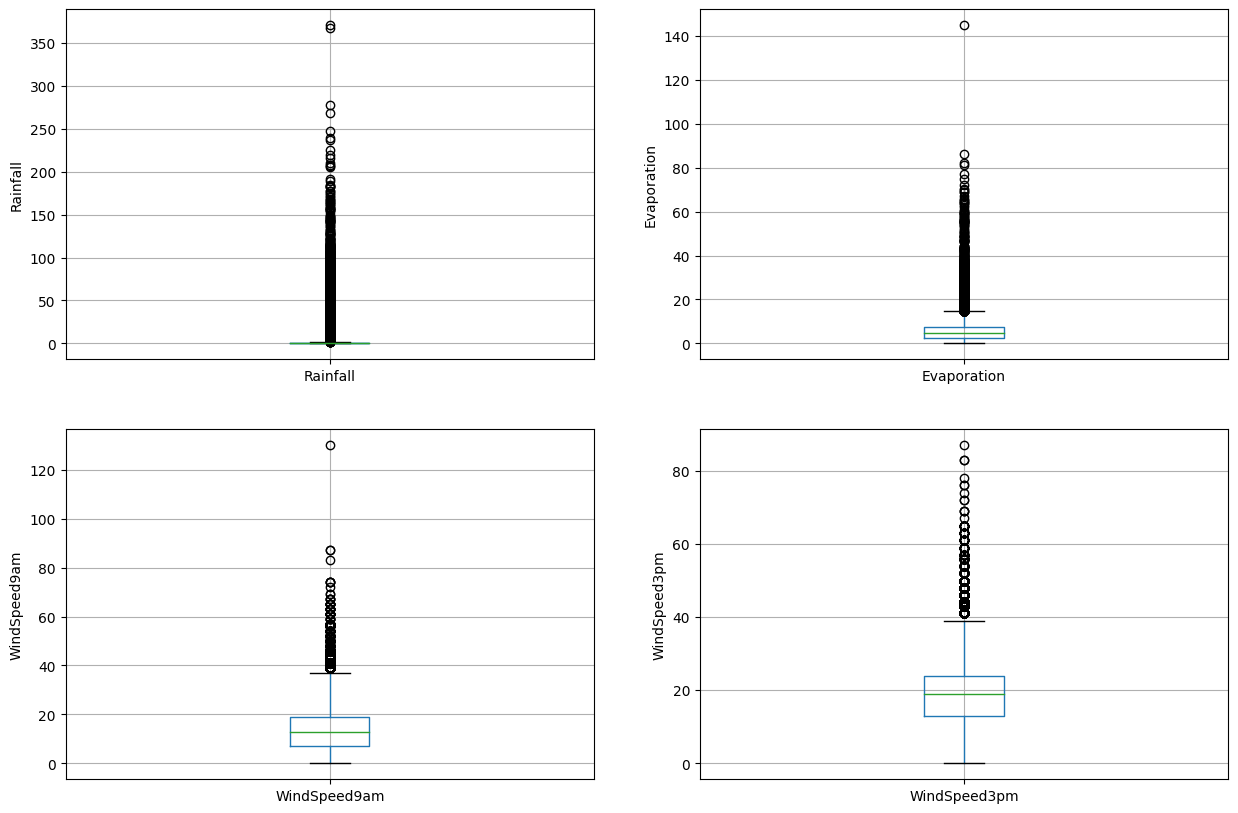

In [ ]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

In [ ]:
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(170487, 23)

<ipython-input-31-030ee7a29b73>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<Axes: >

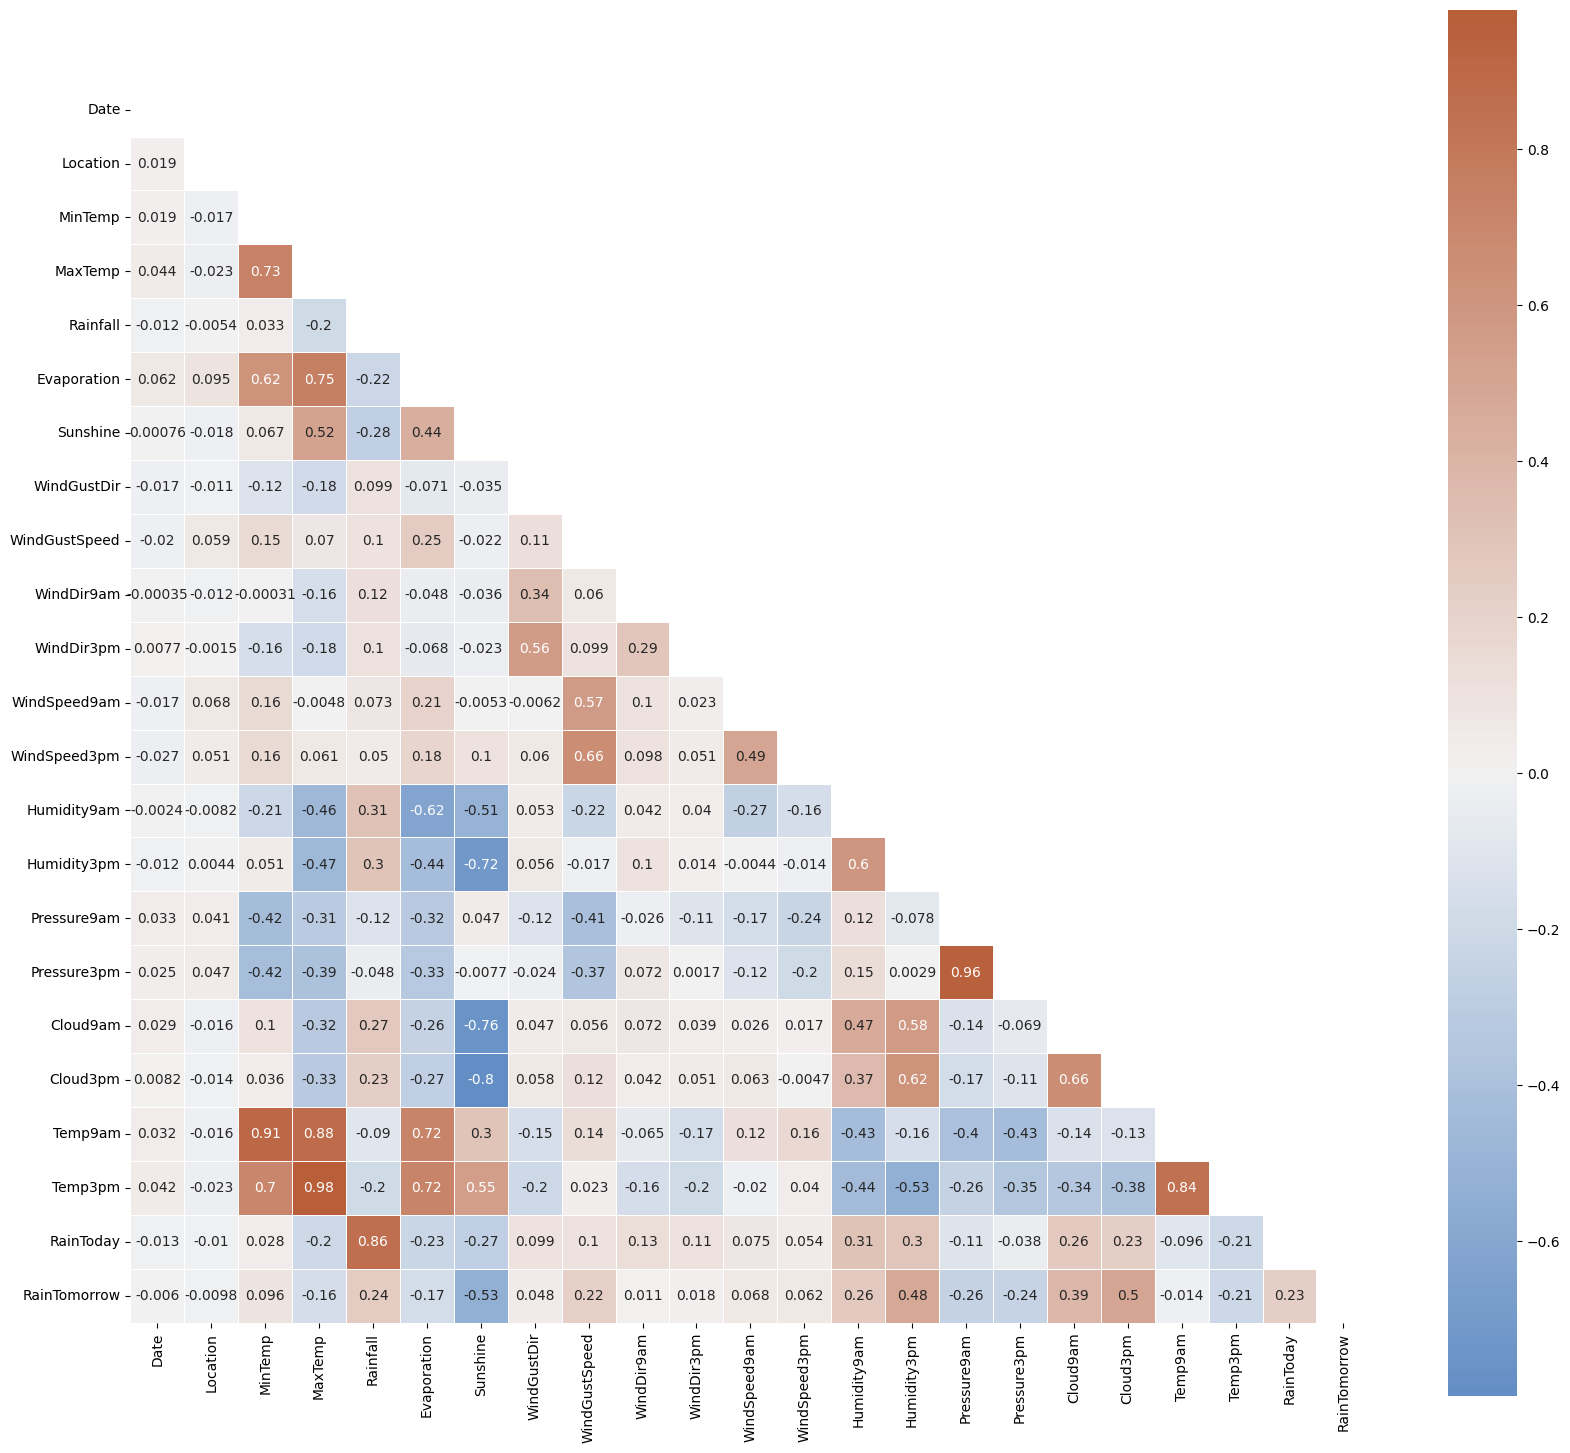

In [ ]:
# Correlation Heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

In [ ]:
IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -2.4000000000000004 or > 3.2


In [ ]:
#sns.pairplot( data=MiceImputed, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation'), hue='RainTomorrow' )

In [ ]:
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)
modified_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.115284,0.041667,0.543417,0.514778,0.436009,0.574705,0.512218,0.866667,0.521127,0.866667,...,0.552466,0.223816,0.245714,0.298295,0.866715,0.475499,0.506775,0.530612,0.245826,0.0
1,0.115575,0.041667,0.375350,0.568966,0.373343,0.567058,0.747319,0.933333,0.521127,0.400000,...,0.248046,0.253669,0.328571,0.318182,0.339001,0.254644,0.514905,0.594388,0.245826,0.0
2,0.115866,0.041667,0.529412,0.583744,0.373343,0.697747,0.794675,1.000000,0.549296,0.866667,...,0.180397,0.303424,0.242857,0.343750,0.346547,0.195309,0.617886,0.566327,0.245826,0.0
3,0.116157,0.041667,0.425770,0.640394,0.373343,0.587234,0.763559,0.266667,0.239437,0.600000,...,0.259321,0.164109,0.528571,0.460227,0.295523,0.205518,0.539295,0.650510,0.245826,0.0
4,0.116448,0.041667,0.658263,0.746305,0.477786,0.645529,0.415253,0.866667,0.478873,0.066667,...,0.676488,0.333278,0.334286,0.267045,0.782549,0.781234,0.531165,0.732143,0.245826,0.0


Text(0, 0.5, 'WindSpeed3pm')

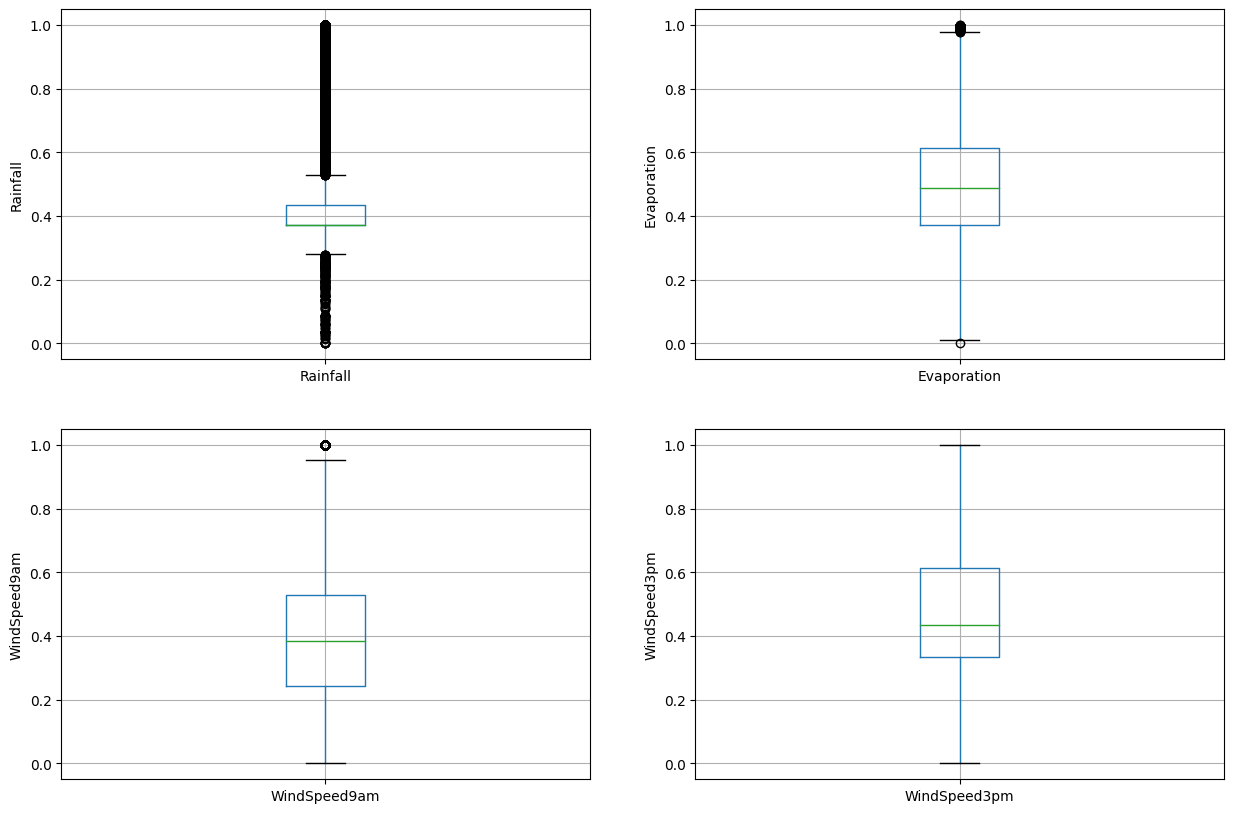

In [ ]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = modified_data.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = modified_data.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = modified_data.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = modified_data.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

feature selection

In [ ]:
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)
modified_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.115284,0.041667,0.543417,0.514778,0.436009,0.574705,0.512218,0.866667,0.521127,0.866667,...,0.552466,0.223816,0.245714,0.298295,0.866715,0.475499,0.506775,0.530612,0.245826,0.0
1,0.115575,0.041667,0.375350,0.568966,0.373343,0.567058,0.747319,0.933333,0.521127,0.400000,...,0.248046,0.253669,0.328571,0.318182,0.339001,0.254644,0.514905,0.594388,0.245826,0.0
2,0.115866,0.041667,0.529412,0.583744,0.373343,0.697747,0.794675,1.000000,0.549296,0.866667,...,0.180397,0.303424,0.242857,0.343750,0.346547,0.195309,0.617886,0.566327,0.245826,0.0
3,0.116157,0.041667,0.425770,0.640394,0.373343,0.587234,0.763559,0.266667,0.239437,0.600000,...,0.259321,0.164109,0.528571,0.460227,0.295523,0.205518,0.539295,0.650510,0.245826,0.0
4,0.116448,0.041667,0.658263,0.746305,0.477786,0.645529,0.415253,0.866667,0.478873,0.066667,...,0.676488,0.333278,0.334286,0.267045,0.782549,0.781234,0.531165,0.732143,0.245826,0.0


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday'],
      dtype='object')


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = MiceImputed.drop('RainTomorrow', axis=1)
y = MiceImputed['RainTomorrow']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Sunshine', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm']
[0.03259617 0.02839331 0.03284652 0.03239945 0.0217827  0.03303768
 0.13988228 0.02080745 0.0424833  0.02162802 0.02177461 0.0219612
 0.02356919 0.03516467 0.10640556 0.04765716 0.0616542  0.05657862
 0.13993415 0.03170509 0.03612424 0.01161443]


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = MiceImputed.drop('RainTomorrow', axis=1)
y = MiceImputed['RainTomorrow']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)

['Sunshine', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm']


In [ ]:
features = MiceImputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir',
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
                       'RainToday']]
target = MiceImputed['RainTomorrow']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# Create model
model = LogisticRegression()
# Fit model
model.fit(X_train, y_train)
# Predict on test data
y_pred = model.predict(X_test)
# Evaluate model
print(classification_report(y_test, y_pred))
accuracy_loc = accuracy_score(y_test, y_pred)
print(accuracy_loc)

              precision    recall  f1-score   support

         0.0       0.81      0.84      0.82     23967
         1.0       0.78      0.74      0.76     18655

    accuracy                           0.79     42622
   macro avg       0.79      0.79      0.79     42622
weighted avg       0.79      0.79      0.79     42622

0.7949885035896954


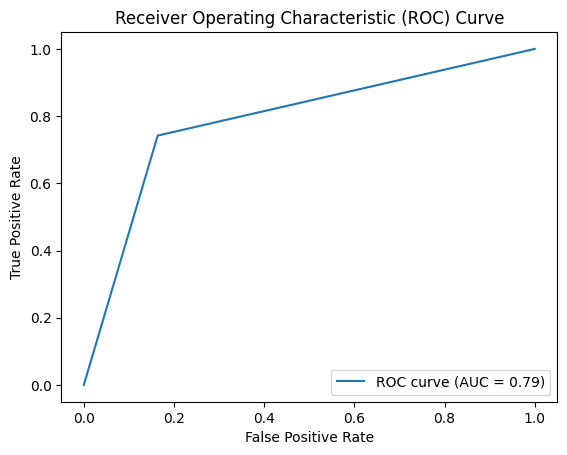

In [ ]:
# create a roc curve

from sklearn.metrics import roc_curve, roc_auc_score
# Compute ROC curve and area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy}')

Random Forest Accuracy: 0.9547886068227676


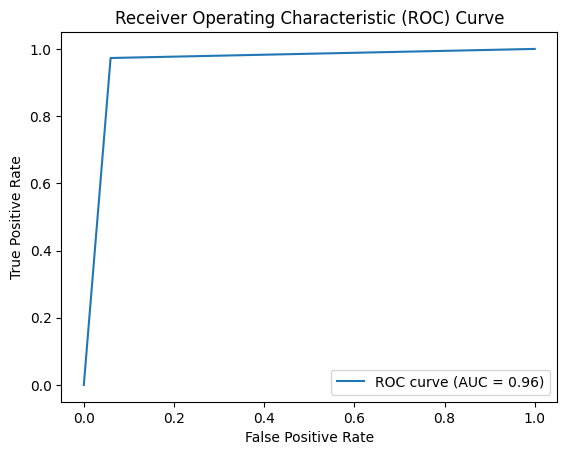

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
# Compute ROC curve and area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

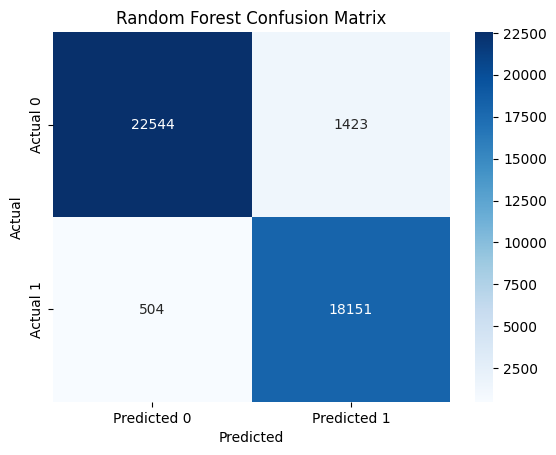

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming 'y_test' is the ground truth labels and 'y_pred_rf' is the predicted labels
# (you should replace these with your actual test labels and predictions)
y_true_rf = y_test  # Replace with your actual ground truth labels
y_pred_rf = rf_model.predict(X_test)  # Replace with your actual predicted labels

# Calculate confusion matrix
cm_rf = confusion_matrix(y_true_rf, y_pred_rf)

# Plot the confusion matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM model
svm_model = SVC(kernel='linear', C=1, random_state=42)

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm}')

SVM Accuracy: 0.7953638965792313


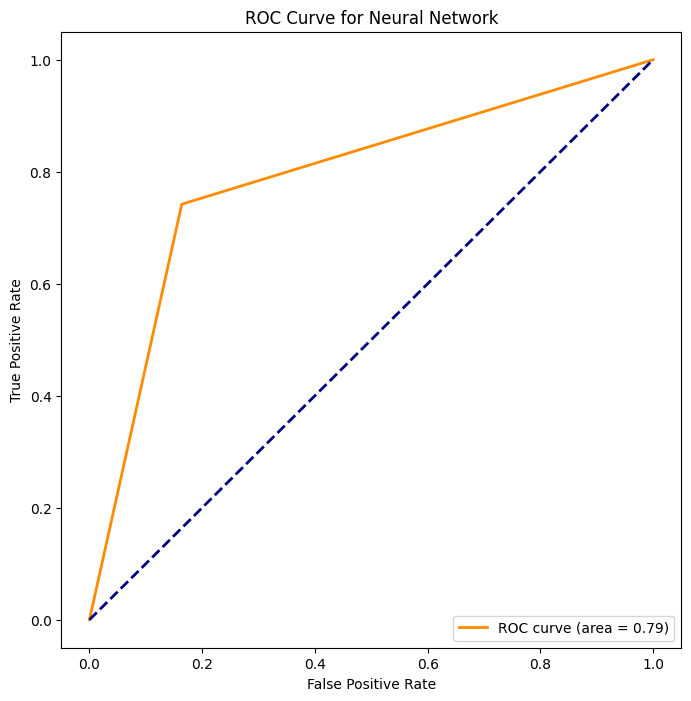

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming 'y_test' is the ground truth labels and 'y_pred_probs' is the predicted probabilities
# (you should replace these with your actual test labels and predicted probabilities)
y_true_nn = y_test  # Replace with your actual ground truth labels
y_pred_probs_nn = model.predict(X_test)  # Replace with your actual predicted probabilities

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_true_nn, y_pred_probs_nn)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Neural Network')
plt.legend(loc='lower right')
plt.show()


<Axes: >

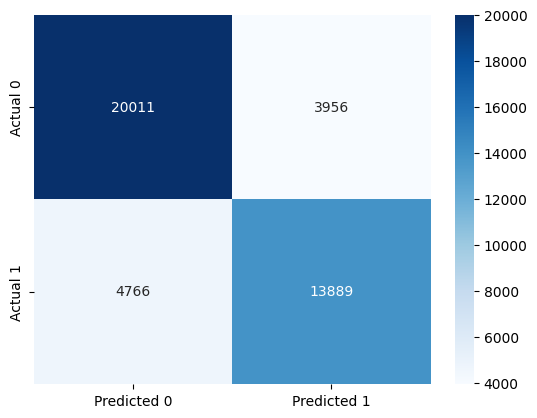

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming 'y_test' is the ground truth labels and 'y_pred_svm' is the predicted labels
# (you should replace these with your actual test labels and predictions)
y_true_svm = y_test
y_pred_svm = svm_model.predict(X_test)

# Calculate confusion matrix
cm_svm = confusion_matrix(y_true_svm, y_pred_svm)

# Plot the confusion matrix
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score

# Create a neural network model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Assuming binary classification, change for multiclass
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test data
y_pred_nn = (model.predict(X_test) > 0.5).astype(int)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f'Neural Network Accuracy: {accuracy_nn}')


Epoch 1/10
3996/3996 [==============================] - 22s 5ms/step - loss: 0.4233 - accuracy: 0.8047 - val_loss: 0.3992 - val_accuracy: 0.8179
Epoch 2/10
3996/3996 [==============================] - 16s 4ms/step - loss: 0.3752 - accuracy: 0.8325 - val_loss: 0.3550 - val_accuracy: 0.8438
Epoch 3/10
3996/3996 [==============================] - 16s 4ms/step - loss: 0.3434 - accuracy: 0.8483 - val_loss: 0.3363 - val_accuracy: 0.8527
Epoch 4/10
3996/3996 [==============================] - 16s 4ms/step - loss: 0.3267 - accuracy: 0.8559 - val_loss: 0.3273 - val_accuracy: 0.8524
Epoch 5/10
3996/3996 [==============================] - 16s 4ms/step - loss: 0.3137 - accuracy: 0.8604 - val_loss: 0.3171 - val_accuracy: 0.8577
Epoch 6/10
3996/3996 [==============================] - 16s 4ms/step - loss: 0.3044 - accuracy: 0.8634 - val_loss: 0.3127 - val_accuracy: 0.8577
Epoch 7/10
3996/3996 [==============================] - 16s 4ms/step - loss: 0.2957 - accuracy: 0.8684 - val_loss: 0.2950 - val_ac

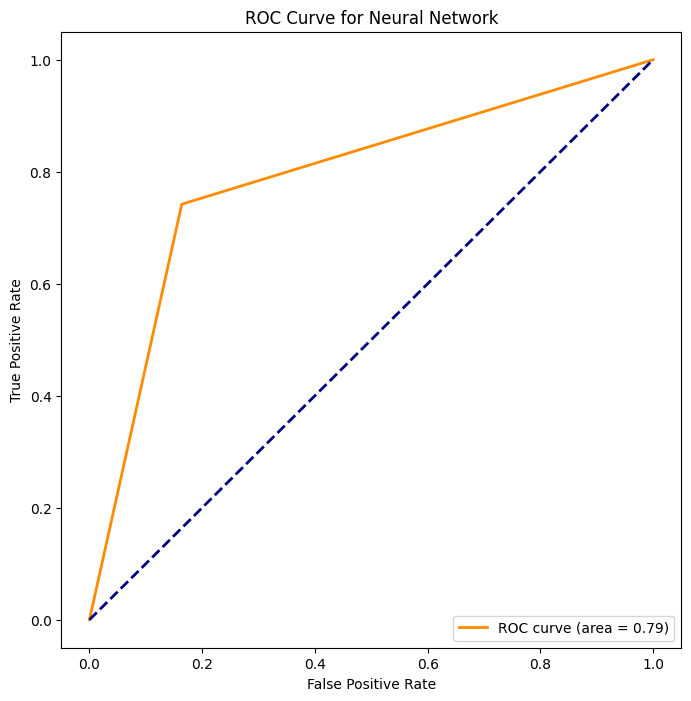

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming 'y_test' is the ground truth labels and 'y_pred_probs' is the predicted probabilities
# (you should replace these with your actual test labels and predicted probabilities)
y_true_nn = y_test  # Replace with your actual ground truth labels
y_pred_probs_nn = model.predict(X_test)  # Replace with your actual predicted probabilities

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_true_nn, y_pred_probs_nn)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Neural Network')
plt.legend(loc='lower right')
plt.show()


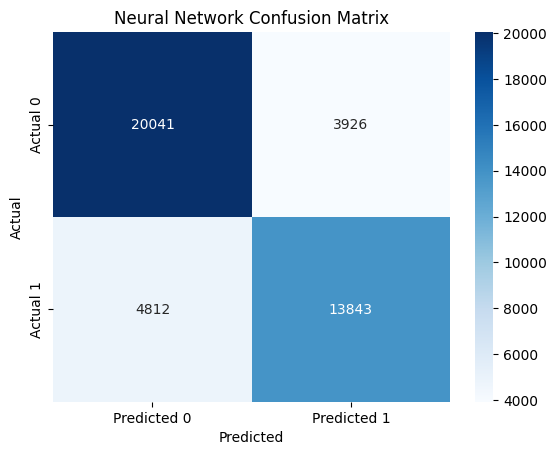

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming 'y_test' is the ground truth labels and 'y_pred_nn' is the predicted labels
# (you should replace these with your actual test labels and predictions)
y_true_nn = y_test  # Replace with your actual ground truth labels
y_pred_nn = (model.predict(X_test) > 0.5).astype(int)  # Replace with your actual test predictions

# Calculate confusion matrix
cm_nn = confusion_matrix(y_true_nn, y_pred_nn)

# Plot the confusion matrix
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Neural Network Confusion Matrix')
plt.show()


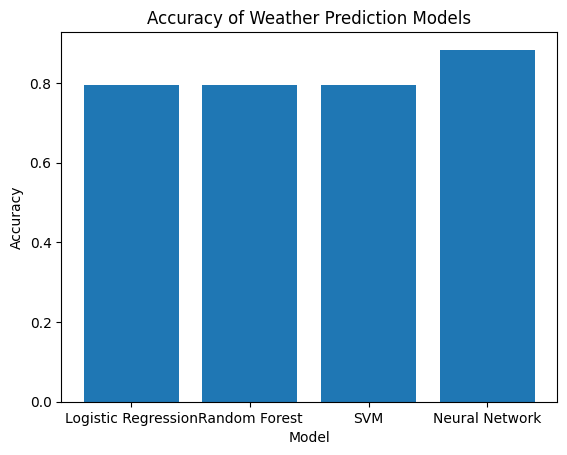

In [ ]:


import matplotlib.pyplot as plt


models = ['Logistic Regression', 'Random Forest', 'SVM', 'Neural Network']
accuracies = [accuracy_loc, accuracy, accuracy_svm, accuracy_nn]


plt.bar(models, accuracies)

plt.title('Accuracy of Weather Prediction Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')


plt.show()
